In [1]:

import os 
from copy import deepcopy
from Composite.RunFullModel import RunFullModel
join = os.path.join

In [2]:
params_composite ={
    "r"         :  0.25,
    "h"         :  0.65,
    "z0"        :  2.82/2,
    "density"   : 8,
    "interface_factor"  :  1.2,
    "with_interface"    : False,
    "mirror"            : True,
    "check_jacobian"    : False,
}

params_ccx = {
    "epsilon" : 0.1,
}
params = {
    "mesh" : params_composite,
    "ccx"  : params_ccx,
}

In [3]:
import numpy as np

In [4]:
np.linspace(0.2 ,0.3,5)

array([0.2  , 0.225, 0.25 , 0.275, 0.3  ])

In [5]:
r_span = np.linspace(0.15 ,0.25,5)
r_span

array([0.15 , 0.175, 0.2  , 0.225, 0.25 ])

In [ ]:
design = "C"
for j,ir in enumerate(r_span):

    # Generate mesh and RVE
    params_copy = deepcopy(params)
    params_copy["mesh"]["r"] = ir

    root = join("output","r_{:02d}".format(j))
    print("Running case ",root)

    RunFullModel(design,root,params_copy)

    

Running case  output\r_00
	Design C
Layer With Sign 1 and number 1/2 done
Layer With Sign 1 and number 2/2 done
Meshing ... 
Optimizing mesh ... 
	CCX C
Input folder: 	 output\r_00\designs\C
Output folder: 	 output\r_00\ccx\C
Running Calculix at:  output\r_00\ccx\C
Output file:  c:\Users\djoroya\Documents\GitHub\CITISENS_Composite\scripts\Homogenization_C\output\r_00\ccx\C\out.txt
Command:
 mpiexec -n 4 c:\Users\djoroya\Documents\GitHub\CITISENS_Composite\.conda\Lib\site-packages\djccx\bin\ccx_dynamic.exe main
Error reading cvf file

pid:  10708 

Calculix finished

Running case  output\r_01
	Design C
Layer With Sign 1 and number 1/2 done
Layer With Sign 1 and number 2/2 done
Meshing ... 
Optimizing mesh ... 
	CCX C
Input folder: 	 output\r_01\designs\C
Output folder: 	 output\r_01\ccx\C
Running Calculix at:  output\r_01\ccx\C
Output file:  c:\Users\djoroya\Documents\GitHub\CITISENS_Composite\scripts\Homogenization_C\output\r_01\ccx\C\out.txt
Command:
 mpiexec -n 4 c:\Users\djoroya\Doc

In [7]:
from djccx.frd.readfrd import readfrd

In [8]:
import glob,os
join = os.path.join

In [9]:
frd_files = glob.glob(join("output","r_*","ccx","C","*.frd"),recursive=True)
frd_files

['output\\r_00\\ccx\\C\\main.frd',
 'output\\r_01\\ccx\\C\\main.frd',
 'output\\r_02\\ccx\\C\\main.frd',
 'output\\r_03\\ccx\\C\\main.frd',
 'output\\r_04\\ccx\\C\\main.frd']

In [10]:
ancho = params_composite["z0"] + 0.5*params_composite["h"]
largo = 10 
A = ancho*largo

def compute_Fapl(iffiles):
    ifrd = readfrd(iffiles)
    df = ifrd["data"]
    Fapl = np.sum(df["F2"]*(df["y"] > df["y"].mean()))

    return Fapl

Fapl = [compute_Fapl(f) for f in frd_files]
Sapl = [f/A for f in Fapl]
E_eff = [s / params["ccx"]["epsilon"] for s in Sapl]

In [11]:
# *MATERIAL, NAME=MATRIX
# *ELASTIC
# 2549.7289999999994,0.265

# *MATERIAL, NAME=CARBON
# *ELASTIC
# 230000.0,0.3

E_m = 2549.729 
E_c = 230000.0

E_eff_analytical = E_m + E_c * params["ccx"]["epsilon"]

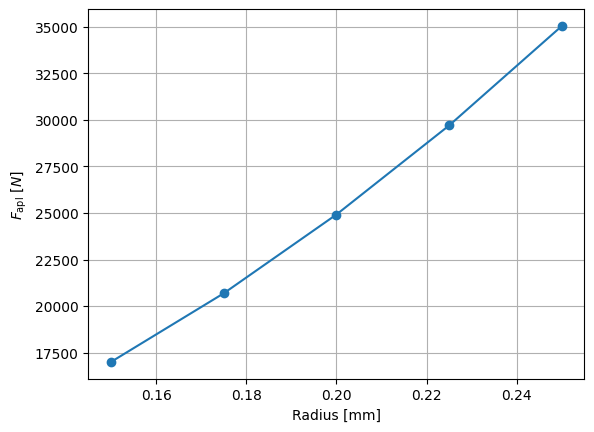

In [12]:
from matplotlib import pyplot as plt
plt.plot(r_span,Fapl,"o-",label="Fapl")
plt.ylabel(r"$F_{\text{apl}} \ [N]$")
plt.xlabel("Radius [mm]")
# grid
plt.grid()

In [13]:
inp

NameError: name 'inp' is not defined